# python libraries

In [102]:
from collections import Counter
import nltk
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from prettytable import PrettyTable
from matplotlib import rcParams
import matplotlib.cm as cm
import string
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import preprocessing
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [34]:
pos_data = pd.read_csv('pos_data.tsv',sep='\t',header=None) 
pos_data=pos_data[:6000]
pos_data.columns=['Type','Tweet']
pos_data.head()

,Type,Tweet
0,pos,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,pos,رسميا اختربت نومتي 😀
2,pos,عيونك وطن وأكثر وطن شد انتباهي 😌
3,pos,وحده تهز 👍
4,pos,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...


In [35]:
neg_data = pd.read_csv('neg_data.tsv',sep='\t',header=None) 
neg_data=neg_data[:3000]
neg_data.columns=['Type','Tweet']
neg_data.head()

,Type,Tweet
0,neg,لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1,neg,أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2,neg,أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3,neg,كذا بنفقد الاطراف في الهجوم 💔
4,neg,…


In [50]:
data=pd.concat([pos_data, neg_data], sort=False,ignore_index=True)
data=data.sample(frac=1)
data.head()

,Type,Tweet
1771,pos,السبت الأخير للدوام 😌
496,pos,قوتنا بعد الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد...
526,pos,والله الاتحادي كل يوم يشجع فريق 😂 عشان فريقه م...
680,pos,آعشق : نظراتگ المختلسهہ ♡ .. تحديدا حينمآ أعلم...
1992,pos,مساء الخير لجميع السناقل .. اما الباقين خل حب ...


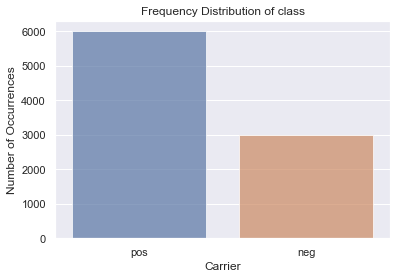

In [51]:
carrier_count = data["Type"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.7)
plt.title('Frequency Distribution of class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'الي يتابعني من زمان يعرف اني ما حفزت على الحضور هالموسم ومقاطع المدرج من فترة طويلة بسبب الفشل ولكن الحين اقول لكم…'

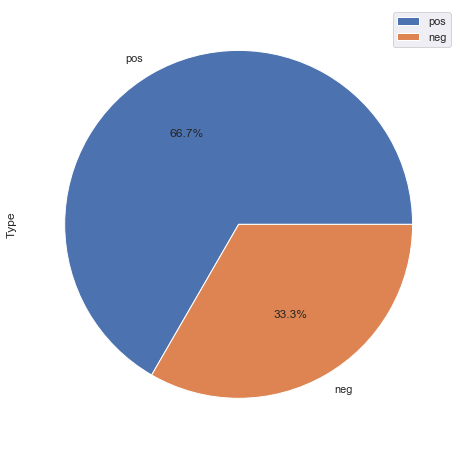

In [53]:
data["Type"].value_counts().head(3).plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

data["Type"].value_counts()

nltk.download('punkt')

nltk.word_tokenize(data["Tweet"][0])

data["Tweet"][0]

# preprocessing

In [54]:
# Tokenize using the white spaces
nltk.tokenize.WhitespaceTokenizer().tokenize(data["Tweet"][0])

['الي',
 'يتابعني',
 'من',
 'زمان',
 'يعرف',
 'اني',
 'ما',
 'حفزت',
 'على',
 'الحضور',
 'هالموسم',
 'ومقاطع',
 'المدرج',
 'من',
 'فترة',
 'طويلة',
 'بسبب',
 'الفشل',
 'ولكن',
 'الحين',
 'اقول',
 'لكم…']

In [56]:
# Tokenize using Punctuations
nltk.tokenize.WordPunctTokenizer().tokenize(data["Tweet"][0])

['الي',
 'يتابعني',
 'من',
 'زمان',
 'يعرف',
 'اني',
 'ما',
 'حفزت',
 'على',
 'الحضور',
 'هالموسم',
 'ومقاطع',
 'المدرج',
 'من',
 'فترة',
 'طويلة',
 'بسبب',
 'الفشل',
 'ولكن',
 'الحين',
 'اقول',
 'لكم',
 '…']

In [57]:
# Tokenization using grammer rules
nltk.tokenize.TreebankWordTokenizer().tokenize(data["Tweet"][0])

['الي',
 'يتابعني',
 'من',
 'زمان',
 'يعرف',
 'اني',
 'ما',
 'حفزت',
 'على',
 'الحضور',
 'هالموسم',
 'ومقاطع',
 'المدرج',
 'من',
 'فترة',
 'طويلة',
 'بسبب',
 'الفشل',
 'ولكن',
 'الحين',
 'اقول',
 'لكم…']

In [58]:
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["Tweet"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [59]:
# porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

In [60]:
# LEMMATIZATION
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["Tweet"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [ ]:
# LEMMATIZATION
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)
# WordNet Lemmatization
wordNetLemmatizedWords = [
    nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df['WordNetLemmatizer'] = pd.Series(wordNetLemmatizedWords)
df

,OriginalWords,WordNetLemmatizer
0,الدليل,الدليل
1,على,على
2,ارهاب,ارهاب
3,حزب,حزب
4,الله,الله
5,ان,ان
6,الناشط,الناشط
7,والحاقد,والحاقد
8,لقمان,لقمان
9,سليم,سليم


In [61]:
data['Tweet'].head() 

1771                                السبت الأخير للدوام 😌
496     قوتنا بعد الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد...
526     والله الاتحادي كل يوم يشجع فريق 😂 عشان فريقه م...
680     آعشق : نظراتگ المختلسهہ ♡ .. تحديدا حينمآ أعلم...
1992    مساء الخير لجميع السناقل .. اما الباقين خل حب ...
Name: Tweet, dtype: object

In [62]:
# Checking null values 
data[data.isnull().any(axis=1)].head()

,Type,Tweet


In [63]:
#Checking null values count
np.sum(data.isnull().any(axis=1))

0

In [64]:
data.isnull().any(axis=0)

Type     False
Tweet    False
dtype: bool

In [65]:
#cleaning tweet text : 
for letter in '#.][!XR':
    data['Tweet'] = data['Tweet'].astype(str).str.replace(letter, '')

In [66]:
data.head()

,Type,Tweet
1771,pos,السبت الأخير للدوام 😌
496,pos,قوتنا بعد الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد...
526,pos,والله الاتحادي كل يوم يشجع فريق 😂 عشان فريقه م...
680,pos,آعشق : نظراتگ المختلسهہ ♡ تحديدا حينمآ أعلم ›...
1992,pos,مساء الخير لجميع السناقل اما الباقين خل حب حي...


In [67]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [68]:
# Remove_punctuations :
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [69]:
# Normalize_arabic : 
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [70]:
# Remove_repeating_char: 
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [71]:
#processPost for applying all functions 
def processPost(tweet):

    # Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)

    # Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)

    # Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet = remove_punctuations(tweet)

    # normalize the tweet
    #tweet= normalize_arabic(tweet)

    # remove repeated letters
    tweet = remove_repeating_char(tweet)

    return tweet

In [73]:
# Applying processPost function for preprocessing 
data["Tweet"] = data["Tweet"].apply(lambda x: processPost(x))

In [74]:
# Getting Tokenize the tweet text 
tokenizer = RegexpTokenizer(r'\w+')
data["Tweet"] = data["Tweet"].apply(tokenizer.tokenize)

In [75]:
data["Tweet"].head()

1771                               [السبت, الأخير, لدوام]
496     [قوتنا, بعد, اله, دائما, أنتم, الف, مبروك, الح...
526     [واله, الاتحادي, كل, يوم, يشجع, فريق, عشان, فر...
680     [آعشق, نظراتگ, المختلسهہ, تحديدا, حينمآ, أعلم,...
1992    [مساء, الخير, لجميع, السناقل, اما, الباقين, خل...
Name: Tweet, dtype: object

In [76]:
# Stop words :
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stopwords_list = stopwords.words('arabic')

In [78]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [79]:
print(len(stopwords_list))

754


In [80]:
print(type(stopwords_list))

<class 'list'>


In [81]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

In [82]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [83]:
# Removing stop words 
data['Tweet'] = data['Tweet'].apply(
    lambda x: [item for item in x if item not in stopwords_list])

In [84]:
# Tweet text information 
all_words = [word for tokens in data['Tweet'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['Tweet']]

In [85]:
VOCAB = sorted(list(set(all_words)))

In [86]:
print("%s words total, with a vocabulary size of %s" %
      (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

83866 words total, with a vocabulary size of 26438
Max sentence length is 818


# Counter

In [87]:
counter = Counter(all_words)

In [88]:
counter.most_common(25)

[('اله', 1440),
 ('الهم', 574),
 ('pos', 562),
 ('الهلال', 362),
 ('الي', 349),
 ('الخير', 319),
 ('يارب', 274),
 ('انا', 271),
 ('واله', 264),
 ('رتويت', 264),
 ('ان', 249),
 ('السحب', 236),
 ('يوم', 223),
 ('سحب', 197),
 ('فوز', 179),
 ('النصر', 177),
 ('الناس', 173),
 ('قال', 173),
 ('الحمد', 172),
 ('مبروك', 158),
 ('اليوم', 157),
 ('شي', 151),
 ('بمناسبة', 149),
 ('خير', 145),
 ('ساعة', 143)]

In [89]:
counted_words = Counter(all_words)

In [90]:
#top 25 words in positive 
words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

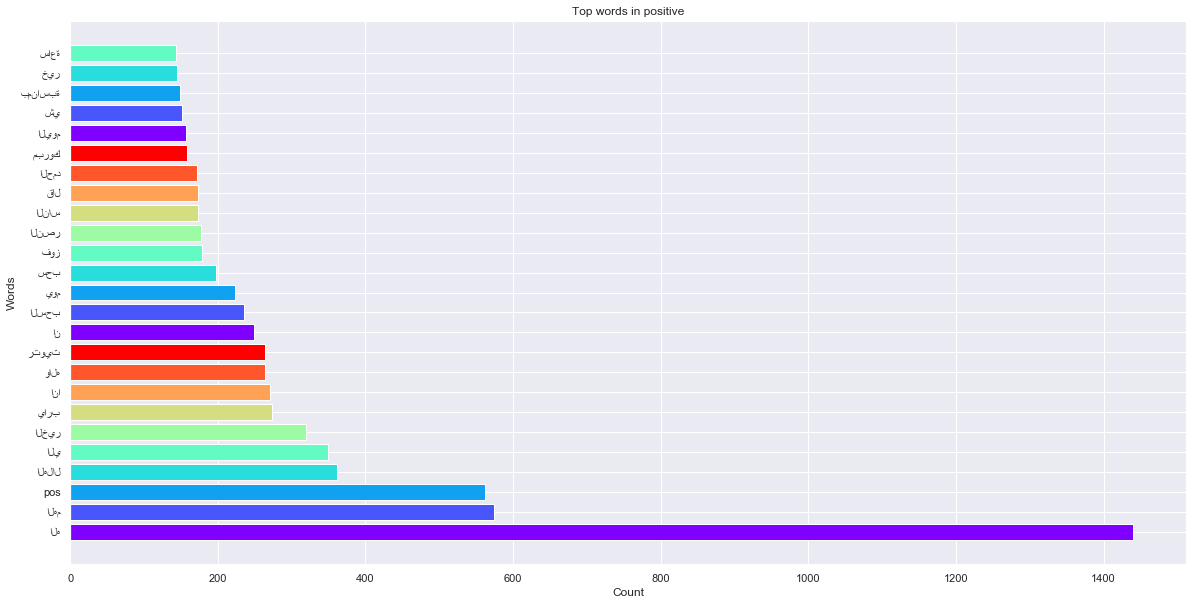

In [91]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words'bbB)
plt.barh(words, counts, color=colors)

# Binary Vectorizer

In [108]:
word_vectorizer_Binary=CountVectorizer(
    binary=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000)

In [110]:
unigramdataGet1 = word_vectorizer_Binary.fit_transform(data['Tweet'].astype('str'))
unigramdataGet1 = unigramdataGet1.toarray()

vocab1 = word_vectorizer_Binary.get_feature_names()
unigramdata_features1 = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features1[unigramdata_features > 0] = 1

unigramdata_features1.head()

,1953,30,40,412,413,419,50,ace10,alexaplay,at,...,ٱلعظيم,ٱني,ٲليس,ڪن,ڪيف,گل,گلنا,گم,گن,ھادي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Count  Vectorizer

In [107]:
word_vectorizer_Count=CountVectorizer(
    binary=False,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000)

In [111]:
unigramdataGet2 = word_vectorizer_Count.fit_transform(data['Tweet'].astype('str'))
unigramdataGet2 = unigramdataGet2.toarray()

vocab2 = word_vectorizer_Count.get_feature_names()
unigramdata_features2 = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features2[unigramdata_features > 0] = 1

unigramdata_features2.head()

,1953,30,40,412,413,419,50,ace10,alexaplay,at,...,ٱلعظيم,ٱني,ٲليس,ڪن,ڪيف,گل,گلنا,گم,گن,ھادي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Features Extraction from tweets text with TF-DIF unigram

In [92]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000)

In [94]:
unigramdataGet = word_vectorizer.fit_transform(data['Tweet'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features > 0] = 1

unigramdata_features.head()

2022-05-21 00:07:47.168 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,1953,30,40,412,413,419,50,ace10,alexaplay,at,...,ٱلعظيم,ٱني,ٲليس,ڪن,ڪيف,گل,گلنا,گم,گن,ھادي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Encoding class as 1 for Postive class and 0 for negative class : 
pro = preprocessing.LabelEncoder()
data['Type'].replace({-1: 2}, inplace=True)
encpro = pro.fit_transform(data['Type'])
data['Type'] = encpro

In [96]:
y = data['Type']
X = unigramdata_features
y

1771    1
496     1
526     1
680     1
1992    1
       ..
7869    0
8568    0
5970    1
4592    1
45      1
Name: Type, Length: 9000, dtype: int32

In [112]:
# Spliting Dataset into 70% Training and 30% Testing : 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=2)

# Trainig and Testing with Machine Learning Algorithms


## Naive Bayes Algorithm : 

In [113]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb


GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.667


In [115]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.49390244 0.81122449]


In [116]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.68644068 0.65702479]


In [117]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.57446809 0.7260274 ]


In [118]:
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None)) 

Accuracy= 0.667
Precision Score :  [0.49390244 0.81122449]
recall_score :  [0.68644068 0.65702479]
F1 :  [0.57446809 0.7260274 ]


## RidgeClassifier Algorithm


In [119]:
RC = RidgeClassifier()
RC = RC.fit(X_train, y_train)
RC

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [120]:
y_pred = RC.predict(X_test)
rc_1 = RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test))) 

Accuracy= 0.717


In [121]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))


Precision Score :  [0.57407407 0.77777778]


In [122]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.52542373 0.80991736]


In [123]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.54867257 0.79352227]


In [124]:
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Accuracy= 0.717
Precision Score :  [0.57407407 0.77777778]
recall_score :  [0.52542373 0.80991736]
F1 :  [0.54867257 0.79352227]


## PassiveAggressiveClassifier Algorithm 
 

In [125]:
PC = PassiveAggressiveClassifier()
PC = PC.fit(X_train, y_train)
PC

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [126]:
y_pred = PC.predict(X_test)
pc_1 = PC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(PC.score(X_test, y_test)))

Accuracy= 0.702


In [127]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.54272152 0.7885274 ]


In [128]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.58135593 0.76115702]


In [129]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.5613748 0.7746005]


## LogisticRegression Algorithm :

In [130]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

y_pred = LR.predict(X_test)
lr_1 = LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))


Accuracy= 0.732


In [132]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.62186788 0.76708303]


In [134]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.46271186 0.86280992]


In [136]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.53061224 0.81213536]


In [137]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))


Precision Score :  [0.62186788 0.76708303]
recall_score :  [0.46271186 0.86280992]
F1 :  [0.53061224 0.81213536]


 ## classification report :

In [138]:
CR = classification_report(y_test, y_pred)
print(CR)
print('\n')
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.62      0.46      0.53       590
           1       0.77      0.86      0.81      1210

    accuracy                           0.73      1800
   macro avg       0.69      0.66      0.67      1800
weighted avg       0.72      0.73      0.72      1800



<function confusion_matrix at 0x00000295FE7D9E58>


## LinearSVC :

In [139]:
svc = LinearSVC(C=1, max_iter=500)
svc = svc.fit(X_train, y_train)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [140]:
y_pred = svc.predict(X_test)
svc_1 = svc.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(svc.score(X_test, y_test)))

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy= 0.714
Precision Score :  [0.56690141 0.78246753]
recall_score :  [0.54576271 0.79669421]
F1 :  [0.55613126 0.78951679]
<function confusion_matrix at 0x00000295FE7D9E58>


## RandomForestClassifier : 

In [141]:
raf = RandomForestClassifier(
    min_samples_leaf=20, min_samples_split=20, random_state=10)
raf = raf.fit(X_train, y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [142]:
y_pred = raf.predict(X_test)
raf_1 = raf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(raf.score(X_test, y_test)))

Accuracy= 0.672


In [143]:

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.         0.67222222]
recall_score :  [0. 1.]
F1 :  [0.         0.80398671]


## VotingClassifier : 

In [144]:
Ens = VotingClassifier(estimators=[(
    'SVM', svc), ('nb', nb), ('RC', RC), ('raf', raf), ('PC', PC), ('LR', LR)], voting='hard')
Ens = Ens.fit(X_train, y_train)
Ens

VotingClassifier(estimators=[('SVM',
                              LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=500,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('RC',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=...
                                                          validation_fraction=0.1,
                                                          verbose=0,
                                                          warm_start=False)),
  

In [145]:
y_pred = Ens.predict(X_test)
Ens_1 = Ens.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(Ens.score(X_test, y_test)))

Accuracy= 0.717


In [146]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.57067138 0.78363047]
recall_score :  [0.54745763 0.79917355]
F1 :  [0.55882353 0.7913257 ]


# Comparison of all algorithms Results

In [147]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Naive Bayes Algorithm", round(nb_1, 2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1, 2)])
x.add_row(["Passive Aggressive Classifier Algorithm", round(pc_1, 2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1, 2)])
x.add_row(["SVM", round(svc_1, 2)])
x.add_row(["Random Forest", round(raf_1, 2)])
x.add_row(["VotingClassifier", round(Ens_1, 2)])
print(x)
print('\n')



Comparison of all algorithms on F1 score
+-----------------------------------------+----------+
|                  Model                  | Accuracy |
+-----------------------------------------+----------+
|          Naive Bayes Algorithm          |   0.67   |
|        Ridge Classifier Algorithm       |   0.72   |
| Passive Aggressive Classifier Algorithm |   0.7    |
|      Logistic Regression Algorithm      |   0.73   |
|                   SVM                   |   0.71   |
|              Random Forest              |   0.67   |
|             VotingClassifier            |   0.72   |
+-----------------------------------------+----------+




In [148]:
# Training Logistic Regression algorithm  : 
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
testing = [
    'الي يتابعني من زمان يعرف اني ما حفزت على الحضور هالموسم ومقاطع المدرج من فترة طويلة بسبب الفشل']

In [150]:
x = word_vectorizer.transform(testing)

In [151]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0        pos


In [152]:
result=pd.DataFrame()
result['Text']=testing
result['Prediction']=prediction
result

,Text,Prediction
0,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...,pos
